# Confusion matrix

In the field of machine learning, a confusion matrix, also known as a contingency table or an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Read more on [wikipedia](https://en.wikipedia.org/wiki/Confusion_matrix)

In [55]:
class Confusion_Matrix(object):
    true_positive = 0
    false_positive = 0
    true_negative = 0
    false_negative = 0
    
    def __init__(self, true_positive, false_positive, \
         false_negative, true_negative):
        self.true_positive = true_positive
        self.false_positive = false_positive
        self.false_negative = false_negative
        self.true_negative = true_negative
    
    def set_true_negative(self, new_value):
        self.true_negative = new_value
    
    def all(self):
        return self.true_negative + self.true_positive + self.false_negative + self.false_positive
    def condition_negative(self):
        return self.false_positive + self.true_negative
    def condition_positive(self):
        return self.true_positive + self.false_negative
    
    def predicted_negative(self):
        return self.false_negative + self.true_negative
    def predicted_positive(self):
        return self.false_positive + self.true_positive
    
    def true_positive_rate(self):
        return self.true_positive/self.condition_positive()
    def negative_predictive_value(self):
        return self.true_negative/(self.false_negative + self.true_negative)
    def accuracy(self):
        return (self.true_positive + self.true_negative) / self.all()
    def specificity(self):
        return self.true_negative/self.condition_negative()
    def sensitivity(self):
        return self.true_positive_rate()
    def recall(self):
        return self.true_positive_rate()
    def precision(self):
        return self.true_positive/self.predicted_positive()
    def f_1(self):
        return (self.precision()*self.recall())/(self.precision() + self.recall())
    
    def print(self):
        print("%.2f       %.2f \n%.2f       %.2f"\
              %(self.true_positive, self.false_positive \
              ,self.false_negative, self.true_negative))
        print("Accuracy = %.2f" % self.accuracy())
        print("Specificity = %.2f" % self.specificity())
        print("Sensitivity = %.2f" % self.sensitivity())
        print("Precision = %.2f" % self.precision())
        print("Recall = %.2f" % self.recall())
        print("F_1 = %.2f" % self.f_1())

# Example 1:

Look at the following confusion matrix:

|                    | Condition positive | Condition negative | 
|--------------------|--------------------|--------------------|
| Predicted positive | 1                  | 0                  |
| Predicted negative | 1                  | 2                  |


In [56]:
cm = Confusion_Matrix(1,0,1,2)
cm.print()

1.00       0.00 
1.00       2.00
Accuracy = 0.75
Specificity = 1.00
Sensitivity = 0.50
Precision = 1.00
Recall = 0.50
F_1 = 0.33


# Example 2:

Look at the following confusion matrix:

|                    | Condition positive | Condition negative | 
|--------------------|--------------------|--------------------|
| Predicted positive | 1                  | 0                  |
| Predicted negative | 3                  | 1                  |

With a large number of predicted negatives, turning out not to be true. Ie. The classifier said it was negative, but in reality it wasn't

In [57]:
cm2 = Confusion_Matrix(1,0, 3,1)
cm2.print()

1.00       0.00 
3.00       1.00
Accuracy = 0.40
Specificity = 1.00
Sensitivity = 0.25
Precision = 1.00
Recall = 0.25
F_1 = 0.20


# Example 3:

Look at the following confusion matrix:

|                    | Condition positive | Condition negative | 
|--------------------|--------------------|--------------------|
| Predicted positive | 1                  | 5                  |
| Predicted negative | 3                  | 0                  |

An even worse result. Almost all classifications are false. This can also be seen
in the Accuracy, while sensitivity (true-positive rate) didnt change much, and 
the Sensitivity (false-negative rate) is the same.  

In [58]:
cm2 = Confusion_Matrix(1,5, 3,0)
cm2.print()

1.00       5.00 
3.00       0.00
Accuracy = 0.11
Specificity = 0.00
Sensitivity = 0.25
Precision = 0.17
Recall = 0.25
F_1 = 0.10


# Evaluating the measures, when changing each cell.

We will start out with a confusion matrix like the following and see what happens to each of the measures

|                    | Condition positive | Condition negative | 
|--------------------|--------------------|--------------------|
| Predicted positive | 100                | 100                |
| Predicted negative | 100                | 100                |

In the following we will try to see how each of the measurements ie. accuracy, specificity ect change as we change each of the cells in isolation. 

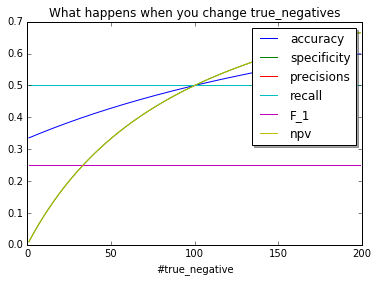

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

cm = Confusion_Matrix(100,100,100,0)
accuracies = []
specificities = []
sensitivities = []
precisions = []
recalls = []
negative_predictive_values = [] 
f_1s = []
therange = range(1, 200)
for i in therange:
    cm.true_negative = i
    accuracies.append(cm.accuracy())
    specificities.append(cm.specificity())
    sensitivities.append(cm.sensitivity())
    precisions.append(cm.precision())
    recalls.append(cm.recall())
    negative_predictive_values.append(cm.negative_predictive_value())
    f_1s.append(cm.f_1())


accuracy_plot = plt.plot(therange, accuracies, label="accuracy")
specificity_plot = plt.plot(therange, specificities, label="specificity")
precisions_plot = plt.plot(therange, precisions, label="precisions")
recalls_plot = plt.plot(therange, recalls, label="recall")
f_1s_plot = plt.plot(therange, f_1s, label="F_1")
npv_plot = plt.plot(therange, negative_predictive_values, label="npv")
plt.title('What happens when you change true_negatives')
plt.xlabel('#true_negative')

plt.legend(loc='upper right', shadow=True)

plt.show()

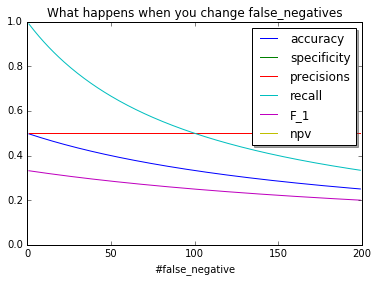

In [61]:
cm = Confusion_Matrix(100,100,100,0)
accuracies = []
specificities = []
sensitivities = []
precisions = []
recalls = []
negative_predictive_values = [] 
f_1s = []
therange = range(1, 200)
for i in therange:
    cm.false_negative = i

    accuracies.append(cm.accuracy())
    specificities.append(cm.specificity())
    sensitivities.append(cm.sensitivity())
    precisions.append(cm.precision())
    recalls.append(cm.recall())
    negative_predictive_values.append(cm.negative_predictive_value())
    f_1s.append(cm.f_1())


accuracy_plot = plt.plot(therange, accuracies, label="accuracy")
specificity_plot = plt.plot(therange, specificities, label="specificity")
precisions_plot = plt.plot(therange, precisions, label="precisions")
recalls_plot = plt.plot(therange, recalls, label="recall")
f_1s_plot = plt.plot(therange, f_1s, label="F_1")
npv_plot = plt.plot(therange, negative_predictive_values, label="npv")

plt.title('What happens when you change false_negatives')
plt.xlabel('#false_negative')

plt.legend(loc='upper right', shadow=True)

plt.show()

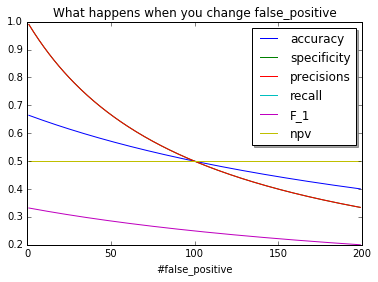

In [65]:

cm = Confusion_Matrix(100,100,100,100)
accuracies = []
specificities = []
sensitivities = []
precisions = []
recalls = []
negative_predictive_values = [] 
f_1s = []
therange = range(1, 200)
for i in therange:
    cm.false_positive = i

    accuracies.append(cm.accuracy())
    specificities.append(cm.specificity())
    sensitivities.append(cm.sensitivity())
    precisions.append(cm.precision())
    recalls.append(cm.recall())
    negative_predictive_values.append(cm.negative_predictive_value())
    f_1s.append(cm.f_1())

accuracy_plot = plt.plot(therange, accuracies, label="accuracy")
specificity_plot = plt.plot(therange, specificities, label="specificity")
precisions_plot = plt.plot(therange, precisions, label="precisions")
recalls_plot = plt.plot(therange, recalls, label="recall")
f_1s_plot = plt.plot(therange, f_1s, label="F_1")
npv_plot = plt.plot(therange, negative_predictive_values, label="npv")


plt.title('What happens when you change false_positive')
plt.xlabel('#false_positive')

plt.legend(loc='upper right', shadow=True)

plt.show()

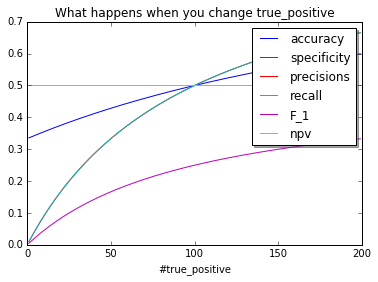

In [64]:

cm = Confusion_Matrix(100,100,100,100)
accuracies = []
specificities = []
sensitivities = []
precisions = []
recalls = []
negative_predictive_values = [] 
f_1s = []
therange = range(1, 200)
for i in therange:
    cm.true_positive = i

    accuracies.append(cm.accuracy())
    specificities.append(cm.specificity())
    sensitivities.append(cm.sensitivity())
    precisions.append(cm.precision())
    recalls.append(cm.recall())
    negative_predictive_values.append(cm.negative_predictive_value())
    f_1s.append(cm.f_1())


accuracy_plot = plt.plot(therange, accuracies, label="accuracy")
specificity_plot = plt.plot(therange, specificities, label="specificity")
precisions_plot = plt.plot(therange, precisions, label="precisions")
recalls_plot = plt.plot(therange, recalls, label="recall")
f_1s_plot = plt.plot(therange, f_1s, label="F_1")
npv_plot = plt.plot(therange, negative_predictive_values, label="npv")


plt.title('What happens when you change true_positive')
plt.xlabel('#true_positive')

plt.legend(loc='upper right', shadow=True)

plt.show()